In [102]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [103]:
imglist = fits.open('/home/hariprasad/Desktop/ss21-astronomy-tasks/data/gll_iem_v02_P6_V11_DIFFUSE.fit')

In [104]:
imglist

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f4c0c3be070>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f4c0c2ff3d0>]

In [105]:
imglist.info()

Filename: /home/hariprasad/Desktop/ss21-astronomy-tasks/data/gll_iem_v02_P6_V11_DIFFUSE.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (720, 360, 30)   float32   
  1  ENERGIES      1 BinTableHDU     19   30R x 1C   [D]   


In [106]:
print("as there are 2 elements in the list or two indexes 0 and 1 in the info, the number of HDU's present in this FITS file is 2")

as there are 2 elements in the list or two indexes 0 and 1 in the info, the number of HDU's present in this FITS file is 2


In [107]:
hdu1 = imglist[0]

In [108]:
hdu1.header

SIMPLE  =                    T / Written by IDL:  Thu Jan 20 07:19:05 2011      
BITPIX  =                  -32 /                                                
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  720 / length of data axis 1                          
NAXIS2  =                  360 / length of data axis 2                          
NAXIS3  =                   30 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
FLUX    =        8.42259635886 /                                                
CRVAL1  =                   0. / Value of longitude in pixel CRPIX1             
CDELT1  =                  0.5 / Step size in longitude                         
CRPIX1  =                360

In [109]:
answerlist = [ hdu1.header[5],hdu1.header[23],hdu1.header[24],hdu1.header[29],hdu1.header[32]]

In [110]:
print(answerlist) # the answers to the questions asked have been put in this array in their respective order

[30, 'photon energy', 'MeV', 'GLAST', 'MICHELSON']


In [111]:
hdu1.data  #extracting the data of primary HDU

array([[[1.20141934e-07, 1.19992990e-07, 1.19992990e-07, ...,
         1.17146094e-07, 1.17146094e-07, 1.17242180e-07],
        [1.26873346e-07, 1.26873346e-07, 1.26829207e-07, ...,
         1.24251599e-07, 1.24325553e-07, 1.24325553e-07],
        [1.31679627e-07, 1.31590227e-07, 1.31542834e-07, ...,
         1.34925770e-07, 1.34955656e-07, 1.35187406e-07],
        ...,
        [1.14278869e-07, 1.14215226e-07, 1.14194677e-07, ...,
         1.09027361e-07, 1.09093030e-07, 1.09137709e-07],
        [1.12280688e-07, 1.12280688e-07, 1.12276986e-07, ...,
         1.09685772e-07, 1.09658203e-07, 1.09658203e-07],
        [1.09558805e-07, 1.09467798e-07, 1.09467798e-07, ...,
         1.09205502e-07, 1.09205502e-07, 1.09279974e-07]],

       [[7.89390882e-08, 7.88358321e-08, 7.88358321e-08, ...,
         7.67633708e-08, 7.67633708e-08, 7.68264741e-08],
        [8.37779766e-08, 8.37779766e-08, 8.37445597e-08, ...,
         8.17242594e-08, 8.17777632e-08, 8.17777632e-08],
        [8.73966570e-08, 

In [112]:
np.max(hdu1.data[0]) #finding maximum pixel value in 1st slice

4.5921523e-05

In [113]:
np.min(hdu1.data[0]) #finding min pixel value

7.027717e-08

In [114]:
np.std(hdu1.data[0]) # finding std deviation

1.3843595e-06

In [115]:
plt.rcParams['figure.figsize'] = [12,9]

Text(0.5, 1.0, 'unstacked image')

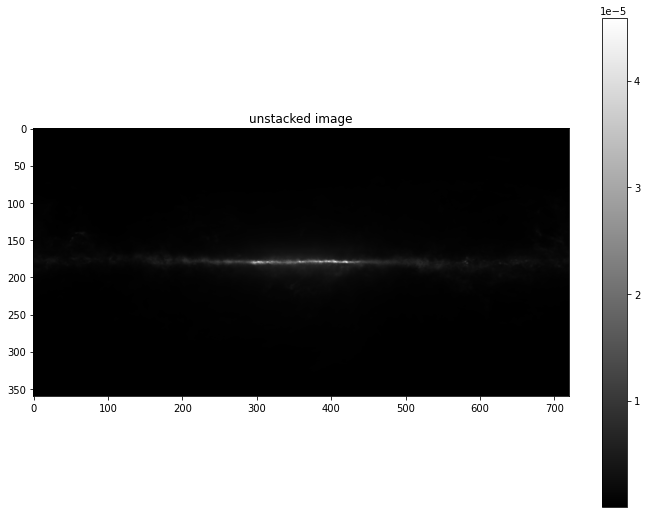

In [116]:
plt.imshow(hdu1.data[0],cmap = 'gray', vmin = 7.027717e-08 , vmax = 4.5921523e-05 )
plt.colorbar()
plt.title('unstacked image')

In [117]:
stackedimgdata = 0
for i in range(4,30,5) :
    stackedimgdata = stackedimgdata + hdu1.data[i]

In [118]:
np.min(stackedimgdata)    # minimum of stacked data

1.2774165e-08

In [119]:
np.max(stackedimgdata)    #maximum of stacked data

1.0907543e-05

In [120]:
np.std(stackedimgdata)    #std deviation of stacked data

3.5807247e-07

In [121]:
plt.rcParams['figure.figsize'] = [12,9]

Text(0.5, 1.0, 'stacked image')

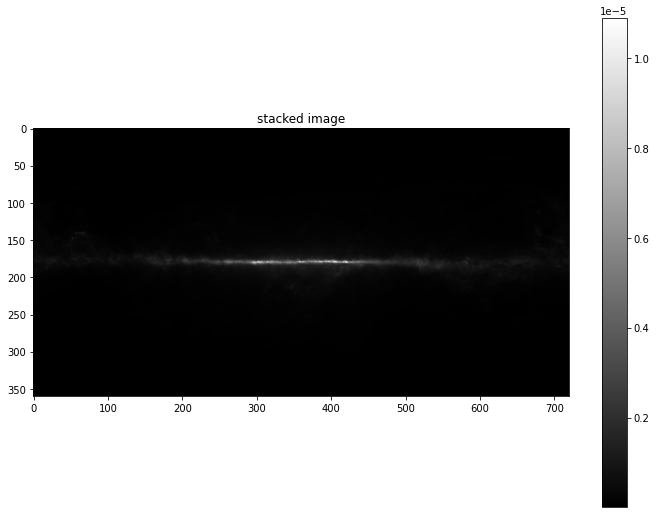

In [122]:
plt.imshow(stackedimgdata,cmap = 'gray',vmin = 1.2774165e-08, vmax = 1.0907543e-05 )  #plotting stacked data
plt.colorbar() 
plt.title('stacked image')

In [123]:
from astropy import units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time

In [124]:
# defining function for returning altitude after 12 hrs 

In [125]:

def futurealt(coord , time ) :
    IITM = EarthLocation(lat=12.992*u.deg, lon=80.234*u.deg, height=50*u.m)
    inputtime = Time(time) - 5.5*u.hour
    futuretime = inputtime + 12*u.hour
    horcoord = coord.transform_to(AltAz(obstime = futuretime , location = IITM))
    return horcoord.alt
    

In [126]:
a = futurealt(SkyCoord(12.11*u.deg, 85.26*u.deg), '2021-7-11 22:00:00')  #sample input

In [127]:
print(a)

14d53m09.859s
